In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import power_transform
from datetime import datetime
import statsmodels.api as sm

In [73]:
def load_data():
    df = pd.read_csv('data/bitcoin_new.zip')
    df = df.iloc[::1440]
    close = df.pop('Close')
    close_df = pd.DataFrame(close)
    return close_df

In [74]:
price = load_data()

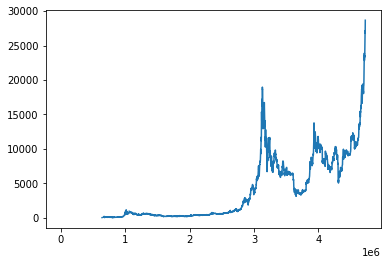

In [75]:
plt.plot(price);

In [81]:
def fill_na(df):
#     df = df.iloc[::1440]
#     dt_object = [datetime.fromtimestamp(timestamp) for timestamp in df.index]
#     df.index = dt_object
    df.fillna(method = 'ffill', inplace=True)
    return df

In [82]:
price_24 = fill_na(price)
price_24 = price.set_index(pd.date_range(start='12-31-2011', end='12-26-2020', freq='D'))

In [79]:
price_24.fillna(method = 'ffill', inplace=True)

In [83]:
price_24

,Close
2011-12-31,4.39
2012-01-01,4.39
2012-01-02,4.39
2012-01-03,4.39
2012-01-04,4.39
...,...
2020-12-22,25864.51
2020-12-23,27067.42
2020-12-24,27160.56
2020-12-25,26765.91


In [23]:
# pd.date_range(start='12-31-2011', freq='D', periods = 3284)[-1]

Timestamp('2020-12-26 00:00:00', freq='D')

In [34]:
# for x in price_24.index:
#     for y in dates:
#         print(x == y)

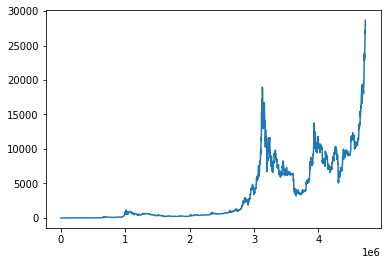

In [61]:
plt.plot(price_24);

In [84]:
price_24_diff = price_24.diff()[1:]

In [85]:
test = sm.tsa.stattools.adfuller(price_24_diff)
print("ADF p-value for differenced price: {0:2.2f}".format(test[1]))

ADF p-value for differenced price: 0.00


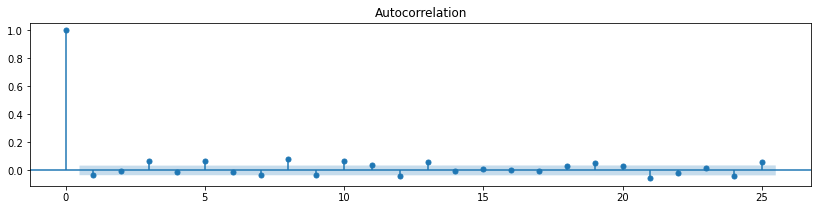

In [86]:
fig, ax = plt.subplots(1, figsize=(14, 3))
_ = sm.graphics.tsa.plot_acf(price_24_diff, lags=25, ax=ax)

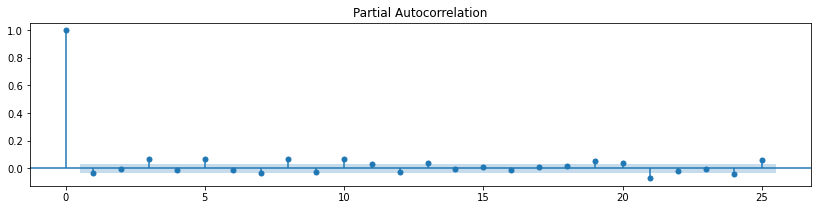

In [87]:
fig, ax = plt.subplots(1, figsize=(14, 3))
_ = sm.graphics.tsa.plot_pacf(price_24_diff, lags=25, ax=ax)

In [88]:
price_24

,Close
2011-12-31,4.39
2012-01-01,4.39
2012-01-02,4.39
2012-01-03,4.39
2012-01-04,4.39
...,...
2020-12-22,25864.51
2020-12-23,27067.42
2020-12-24,27160.56
2020-12-25,26765.91


In [89]:
price_model = ARIMA(price_24, order=(1, 1, 0)).fit()

/home/noahprowell/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


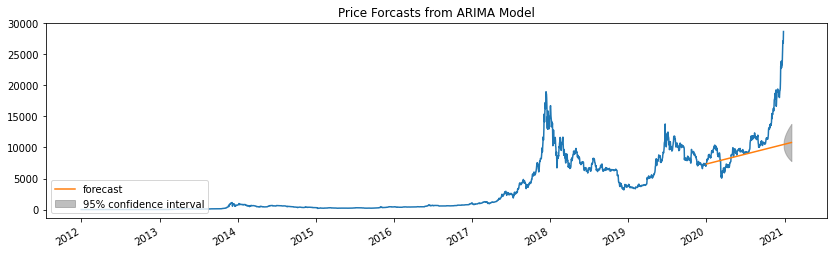

In [90]:
# price_24.reindex(pd.date_range(start='12-31-2011', end='12-26-2020', freq='D'))

fig, ax = plt.subplots(1, figsize=(14, 4))
ax.plot(price_24.index, price_24)
fig = price_model.plot_predict('2020', '2021-02', 
                                  dynamic=True, ax=ax, plot_insample=False)

ax.legend().get_texts()[1].set_text("95% Prediction Interval")
ax.legend(loc="lower left")

ax.set_title("Price Forcasts from ARIMA Model");

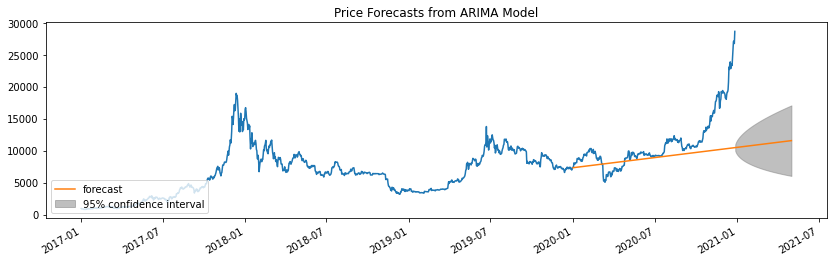

In [95]:
fig, ax = plt.subplots(1, figsize=(14, 4))
ax.plot(price_24['2017':].index, price_24['2017':])
fig = price_model.plot_predict('2020', '2021-05', 
                                  dynamic=True, ax=ax, plot_insample=False)

ax.legend().get_texts()[1].set_text("95% Prediction Interval")
ax.legend(loc="lower left")

ax.set_title("Price Forecasts from ARIMA Model");